In [160]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [188]:
#reading the dataset
forest = pd.read_csv('forestfires.csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [162]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [163]:
#Checking for blanks
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [164]:
#sotring the numerical columns that have more than 2 unique values for plotting
numeric_col = [col for col in forest.select_dtypes(include = [np.number]).columns if forest[col].nunique() > 2]
numeric_col

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

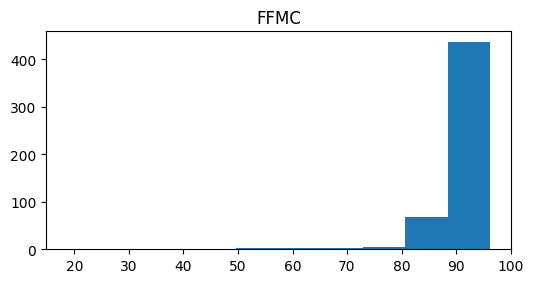

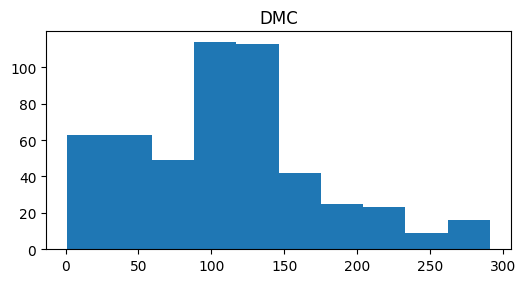

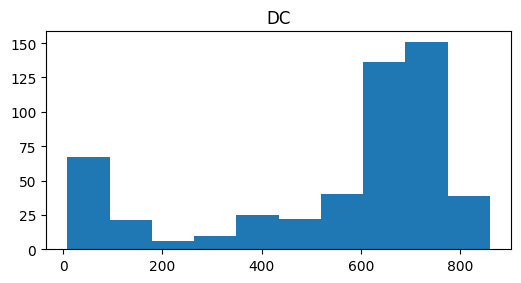

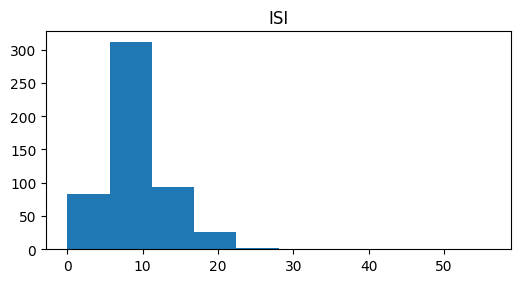

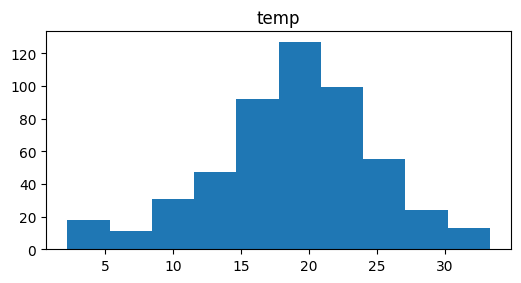

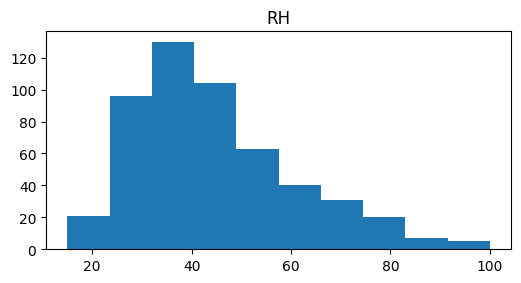

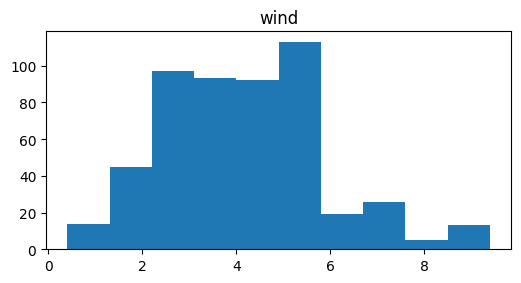

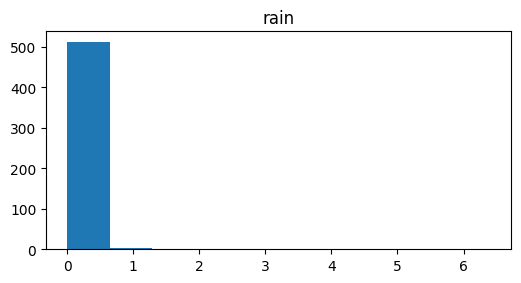

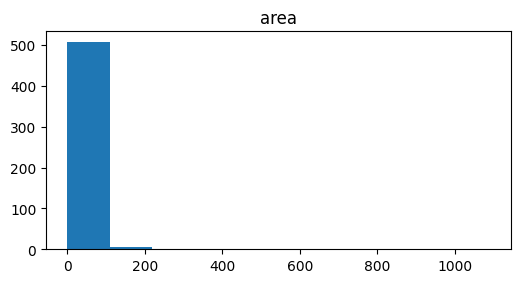

In [165]:
#plotting histograms for all the numerical variables
d= len(numeric_col)
c= 1
for i in numeric_col:
  plt.figure(figsize = (6,30))
  plt.subplot(d,1,c)
  plt.hist(forest[i])
  plt.title(i)
  plt.show()
  c +=1

In [166]:
#ordering the values in the days columns for plotting purpose
days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
forest['day'] = pd.Categorical(forest['day'], categories=days, ordered= True)

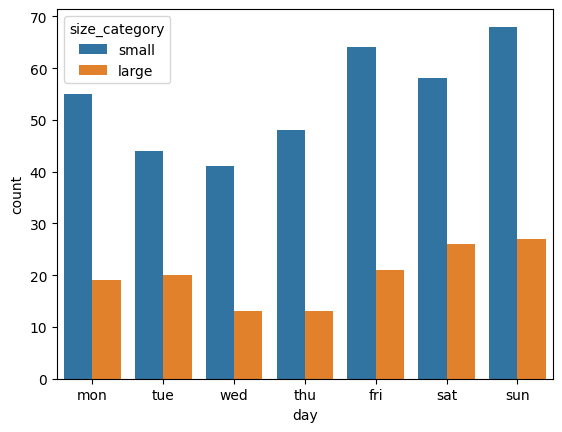

In [167]:
#Plotting a countplot of days with size category
sns.countplot(forest, x= 'day',hue ='size_category')
plt.show()

In [168]:
#ordering the months columns for plotting purpose
months = ['jan', 'feb', 'mar', 'apr', 'may','jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
forest['month'] = pd.Categorical(forest['month'], categories=months, ordered = True)

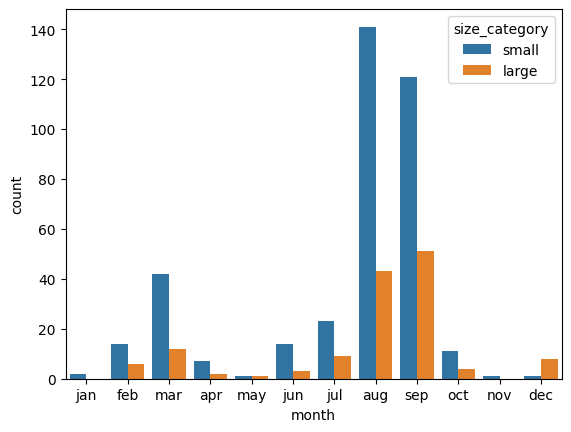

In [169]:
#Plotting a countplot of months with size category
sns.countplot(forest, x= 'month',hue ='size_category')
plt.show()

<ipython-input-170-cba9026cf50c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forest.iloc[:,0:11].corr(), annot=True)


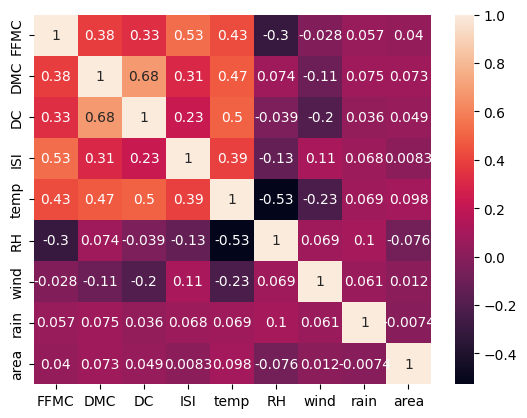

In [170]:
#plotting a heatmap with the correlation values
sns.heatmap(forest.iloc[:,0:11].corr(), annot=True)
plt.show()

In [189]:
#using Label Encoder to convert size_category from categorical to a labels
le = LabelEncoder()
forest['size_category'] = le.fit_transform(forest.size_category)
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [190]:
#dropping the month and day column from the dataset as they wont be of any use in the model trainig.
forest.drop(['month', 'day'], axis=1, inplace = True)
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [199]:
#splitting the data into dependent and independent variables
x = forest.drop(['size_category'], axis = 1)
y = forest['size_category']

In [200]:
#splitting the data into training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size =0.3, random_state= 54)

In [201]:
#Building a SVM model and fitting the training data
svm = SVC()
svm.fit(xtrain, ytrain)

SVC()

In [202]:
#Predicting the testing values
y_pred = svm.predict(xtest)

In [203]:
#printing the Accuracy Score
print(f"Accuracy : {accuracy_score(ytest, y_pred)*100:0.2f}%")

Accuracy : 76.28%


In [204]:
#printing the confusion matrix
confusion_matrix(ytest, y_pred)

array([[  3,  37],
       [  0, 116]])

In [205]:
#printing the classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.14        40
           1       0.76      1.00      0.86       116

    accuracy                           0.76       156
   macro avg       0.88      0.54      0.50       156
weighted avg       0.82      0.76      0.68       156



In [212]:
#Using GridSearchCV to tune hyperparameter
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()

grid = GridSearchCV(svc, parameters, cv=5)
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [213]:
#printing the parameter score and parameter list
print(grid.best_score_, grid.best_params_)

0.975076103500761 {'C': 1, 'kernel': 'linear'}


In [214]:
#fitting the model with the parameters
grid.best_estimator_

SVC(C=1, kernel='linear')

In [215]:
#predicting the value of the testing data
y_pred2 = grid.predict(xtest)

In [216]:
#printing the Accuracy Score
print(f"Accuracy : {accuracy_score(ytest, y_pred2)*100:0.2f}%")

Accuracy : 97.44%


In [217]:
#printing the confusion matrix
confusion_matrix(ytest, y_pred2)

array([[ 40,   0],
       [  4, 112]])

In [218]:
#printing the classification report
print(classification_report(ytest, y_pred2))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       1.00      0.97      0.98       116

    accuracy                           0.97       156
   macro avg       0.95      0.98      0.97       156
weighted avg       0.98      0.97      0.97       156

